In [45]:
import os
import numpy as np
import matplotlib.pyplot as plt

font={'family':'serif',
      # 'style':'italic',  # 斜体
      'weight':'normal',
      # 'color':'red',
      'size': 18
}  
def setfigform_simple(xlabel, ylabel=None, xlimit = (None,None), ylimit = (None, None)):
    # plt.legend(fontsize = 16, frameon=False),
    plt.xlabel(xlabel, fontdict = font)
    plt.ylabel(ylabel, fontdict = font)
    plt.xlim(xlimit)
    plt.ylim(ylimit)
    plt.xticks(fontsize = font['size'], fontname = "serif")
    # plt.yticks(fontsize = font['size'], fontname = "serif")
    plt.yticks([])
    plt.tick_params(direction="in")

In [1]:
import torch
a=torch.ones(3,3).to(device="cuda")

RuntimeError: CUDA error: CUDA-capable device(s) is/are busy or unavailable
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


[[0.         0.         0.         1.        ]
 [0.         0.         0.         0.99607843]
 [0.         0.         0.         0.99215686]
 ...
 [0.         0.         0.         0.00784314]
 [0.         0.         0.         0.00392157]
 [0.         0.         0.         0.        ]]
[[1.         1.         0.         1.        ]
 [1.         1.         0.         0.99607843]
 [1.         1.         0.         0.99215686]
 ...
 [1.         1.         0.         0.00784314]
 [1.         1.         0.         0.00392157]
 [1.         1.         0.         0.        ]]


/nfs/scistore14/chenggrp/ptuo/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/nfs/scistore14/chenggrp/ptuo/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/nfs/scistore14/chenggrp/ptuo/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20041 (\N{CJK UNIFIED IDEOGRAPH-4E49}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/nfs/scistore14/chenggrp/ptuo/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36879 (\N{CJK UNIFIED IDEOGRAPH-900F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/nfs/scistore14/chenggrp/ptuo/miniconda3/lib/python3.10/

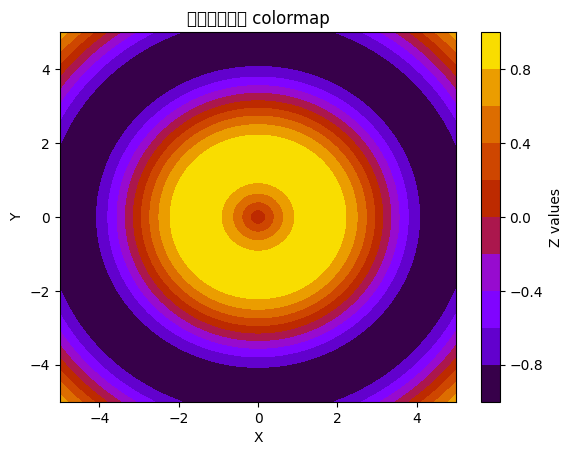

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 创建示例数据
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# 自定义 colormap（颜色和透明度）
def create_alpha_colormap(base_cmap='plasma', alpha=0.7):
    # 获取基础的 colormap
    base = plt.get_cmap(base_cmap)
    # 提取颜色
    base_colors = base(np.arange(base.N))

    alpha_mapped_colors = np.tile(base_colors[np.newaxis,:,:], (base.N, 1, 1))
    alpha_mapped_colors = np.transpose(alpha_mapped_colors, (1,0,2))

    alpha_cmap_all = []
    for i in range(base.N):
        # 修改 alpha 通道
        alpha_mapped_colors[i,:,-1] = np.flip(np.linspace(0, alpha, base.N), axis=0)
    
        # 创建新的 colormap
        alpha_cmap = LinearSegmentedColormap.from_list('alpha_%d'%i, alpha_mapped_colors[i])
        alpha_cmap_all.append(alpha_cmap)
    alpha_cmap_all = np.array(alpha_cmap_all)
    print(alpha_mapped_colors[0])
    print(alpha_mapped_colors[-1])
    return alpha_cmap_all, alpha_mapped_colors, base

# 创建带透明度的 colormap
alpha_cmap, colors, base_cmap = create_alpha_colormap("gnuplot", alpha=1.)

# 绘制图形并使用自定义的 colormap
plt.contourf(X, Y, Z, cmap="gnuplot", levels=10)

# 添加颜色条
plt.colorbar(label='Z values')

# 设置标签和标题
plt.xlabel('X')
plt.ylabel('Y')
plt.title('自定义透明度 colormap')

# 显示图形
plt.show()


In [2]:
import torch

In [48]:
alphas = torch.ones([1000,2])
x = torch.distributions.Dirichlet(alphas).sample()
t = torch.linspace(0,1,100)
logprob = torch.distributions.Dirichlet(alphas).log_prob(x)

In [19]:
alphas_t = []
x_t = []
logprob_t = []
for i in range(2,11):
    alphas_t.append(torch.ones([1000,2]))
    alphas_t[-1][:,0]=i
    x_t.append(torch.distributions.Dirichlet(alphas_t[-1]).sample())
    logprob_t.append(torch.distributions.Dirichlet(alphas_t[-1]).log_prob(x_t[-1]))

In [29]:
coloridx_list = [int((T)/(10)*255) for T in range(1,11)]

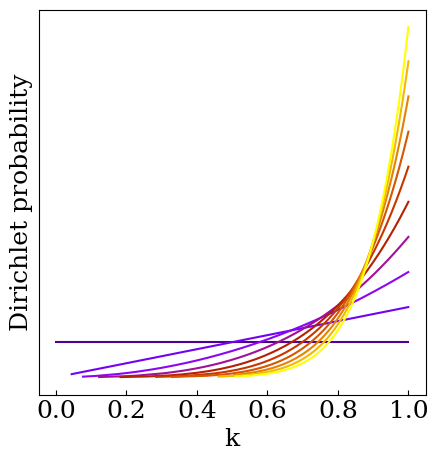

In [53]:
plt.figure(figsize=(5,5))
order = np.argsort(x[:,0].numpy())
plt.plot(x[:,0].numpy()[order], torch.exp(logprob).numpy()[order], c=colors[coloridx_list[0]][0])
for i in range(2,11):
    order = np.argsort(x_t[i-2][:,0].numpy())
    plt.plot(x_t[i-2][:,0].numpy()[order], torch.exp(logprob_t[i-2]).numpy()[order], c=colors[coloridx_list[i-1]][0])
setfigform_simple("k","Dirichlet probability")

In [2]:
e = np.load("e.npy")
e_emb = np.load("e-embed.npy")
e_conv_emb = np.load("e-conv_embed.npy")

In [3]:
t = np.load("t.npy")

In [27]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
# Perform t-SNE to reduce the embedding to 2D
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(m_emb)


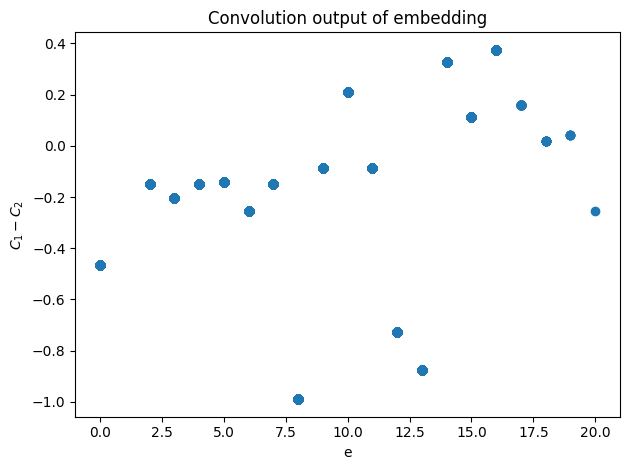

In [5]:

# plt.scatter(m_conv_emb[:, 0], m_conv_emb[:, 1], c=(m-36)/36, cmap='jet', s=20)
# plt.colorbar(label=r'$m/N$')
plt.scatter(e, e_conv_emb[:, 0]-e_conv_emb[:, 1])
# plt.colorbar(label=r'$m/N$')
plt.title('Convolution output of embedding')
# plt.xlabel('Output component 1')
# plt.ylabel('Output component 2')
plt.xlabel('e')
plt.ylabel('$C_1-C_2$')

plt.tight_layout()
plt.show()

In [ ]:
# Perform PCA to reduce the embedding to 2D
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(m_emb)


In [ ]:
plt.figure(figsize=(6, 5))
# Plot the PCA-reduced embeddings
# plt.figure(figsize=(6, 6))
# PCA Scatter plot
# plt.subplot(1, 2, 1)
plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=m-36, cmap='jet', s=20)
plt.colorbar(label='Discrete Input')
plt.title('PCA of Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')



In [38]:
# Perform t-SNE to reduce the embedding to 2D
tsne_e = TSNE(n_components=2, random_state=42)
embeddings_tsne_e = tsne.fit_transform(e_emb)

# Perform PCA to reduce the embedding to 2D
pca_e = PCA(n_components=2)
embeddings_pca_e = pca.fit_transform(e_emb)


In [ ]:
# Plot the PCA-reduced embeddings
plt.figure(figsize=(6, 5))

# PCA Scatter plot
# plt.subplot(1, 2, 1)
plt.scatter(embeddings_pca_e[:, 0], embeddings_pca_e[:, 1], c=e, cmap='jet', s=20)
plt.colorbar(label='Discrete Input')
plt.title('PCA of Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
'''
# t-SNE Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(embeddings_tsne_e[:, 0], embeddings_tsne_e[:, 1], c=e, cmap='jet', s=10)
plt.colorbar(label='Discrete Input')
plt.title('t-SNE of Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
'''
plt.tight_layout()
plt.show()

In [ ]:
raise RuntimeError
plt.rcParams["figure.figsize"] = (6,5)
from scipy.signal import savgol_filter

# Apply Savitzky-Golay filter
l_d_smooth = savgol_filter(alltrainlosses_dir_b1024, window_length=3, polyorder=2)
error = (np.max(alltrainlosses_dir_b1024[-50:])-np.min(alltrainlosses_dir_b1024[-50:]))/2
print(error)
# Plot the smoothed data
plt.plot(alltrainsteps_dir_b1024, l_d_smooth, label='Dirichlet basis', color='blue')

# Add error bars
plt.fill_between(alltrainsteps_dir_b1024, l_d_smooth - error, l_d_smooth + error, color='blue', alpha=0.2)

# Optionally plot the original data
# plt.scatter(alltrainsteps_dir_b1024, alltrainlosses_dir_b1024, color='gray', alpha=0.5, label='Original Data')
setfigform_simple("epoch","loss", xlimit=(None, None))
plt.legend(fontsize=font["size"]-2)